# Student Notes: Data Visualization for ML & EDA

**LogicMojo AI/ML Bootcamp – Module 6**  
Theory → Example → How to Read → Inference.

## Contents
1. Introduction & Workflow
2. Chart Selection Guide (When to Use What)
3. Setup (Matplotlib, Seaborn, Pandas)
4. Line Plots (Matplotlib)
5. Bar & Count Plots
6. Distribution: Histogram, KDE, Rug
7. Box Plot & Violin Plot
8. Scatter & Regression (lmplot)
9. Joint Plot & Pair Plot
10. Heatmap (Correlation)
11. Strip & Swarm Plots
12. Pie & Area Charts
13. Time Series & Multiple Lines
14. FacetGrid (Small Multiples)
15. Subplots (Multiple Axes)
16. Best Practices & Summary

---
# 1. Introduction & Workflow

## Theory
- **Data visualization** = Graphical representation of data (charts, graphs, maps) so we can see trends, outliers, and patterns.
- **Why use it?** Humans process visuals much faster than tables; helps in EDA, model diagnostics, and communicating results.
- **Typical workflow:** Ask a question → Get data → Clean → **Choose the right chart** → Plot → Refine (titles, labels, colors).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid")
%matplotlib inline

tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
print("Tips shape:", tips.shape)
print("Iris shape:", iris.shape)
print(tips.head())

Tips shape: (244, 7)
Iris shape: (150, 5)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


---
# 2. Chart Selection Guide

## Theory
| Goal | Chart type | Example use |
|------|------------|-------------|
| **Trend over time** | Line plot | Sales vs month |
| **Compare categories** | Bar plot | Revenue by region |
| **Count per category** | Count plot | Number of orders by status |
| **Distribution (1 variable)** | Histogram, KDE | Age distribution |
| **Compare distributions** | Box, Violin | Salary by department |
| **Relationship (2 numeric)** | Scatter, lmplot | Price vs area |
| **Correlation (many numeric)** | Heatmap, pair plot | Feature correlations |
| **Part of whole** | Pie, stacked bar | Market share |
| **Small multiples** | FacetGrid | Same plot by category |

---
# 3 & 4. Matplotlib Basics – Line Plot

## Theory
- **Figure** = Entire canvas; **Axes** = One plot area; **Axis** = X/Y number lines.
- `plt.figure(figsize=(w,h))` sets size; `plt.plot(x, y, label=..., color=..., linestyle=...)` draws the line.
- Always add title, xlabel, ylabel, legend (if multiple series), and grid for readability.

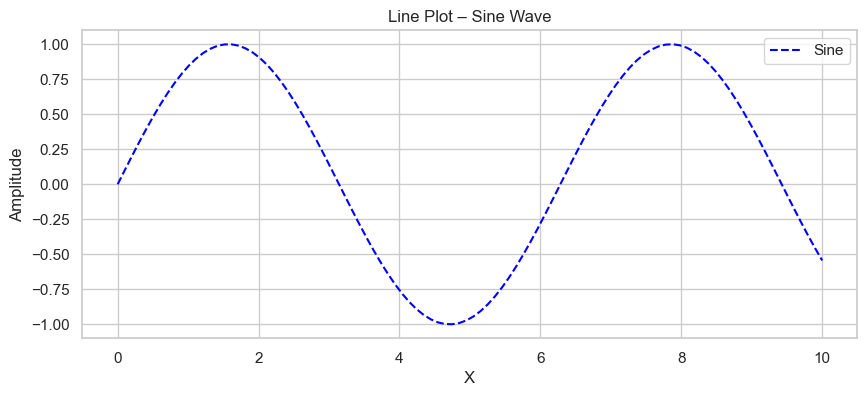

In [2]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Sine', color='blue', linestyle='--')
plt.title('Line Plot – Sine Wave')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### How to Read
X = input values; Y = output; line shows how they relate. Grid helps read exact values.

### Inference
Periodic pattern between -1 and 1; use line plots for trends over a continuous axis.

---
# 5. Bar Plot & Count Plot

## Theory
- **Bar plot**: Height = value of a numeric variable per category. Use when comparing **magnitudes** across categories.
- **Count plot**: Height = **count** of rows per category (no separate y variable). Use for frequency of categorical values.
- Seaborn: `sns.barplot(data=df, x=..., y=..., hue=...)`; `sns.countplot(data=df, x=...)`.

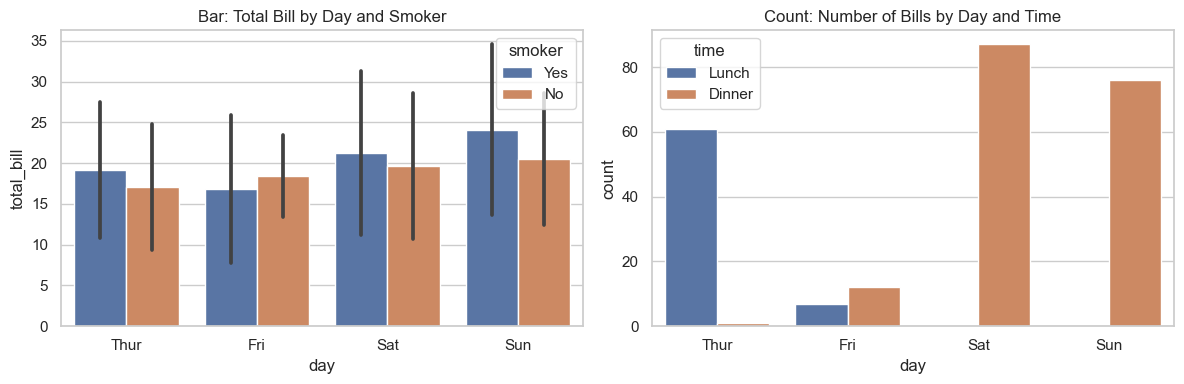

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=tips, x='day', y='total_bill', hue='smoker', ax=axes[0], errorbar='sd')
axes[0].set_title('Bar: Total Bill by Day and Smoker')

sns.countplot(data=tips, x='day', hue='time', ax=axes[1])
axes[1].set_title('Count: Number of Bills by Day and Time')
plt.tight_layout()
plt.show()

### How to Read
Bar: each bar’s height = mean total_bill (with SD); grouped by day and smoker. Count: height = number of rows in that category.

### Inference
Bar plot shows which day/smoker combination has higher bills; count plot shows how many lunch vs dinner bills per day.

---
# 6. Distribution: Histogram, KDE, Rug

## Theory
- **Histogram**: Bins the data; bar height = count (or density) in each bin. Shows shape of a single numeric variable.
- **KDE (Kernel Density Estimate)**: Smooth curve approximating the distribution.
- **Rug**: Small ticks along the axis showing individual points. Use `sns.histplot(..., kde=True)` or `sns.kdeplot()`, `sns.rugplot()`.

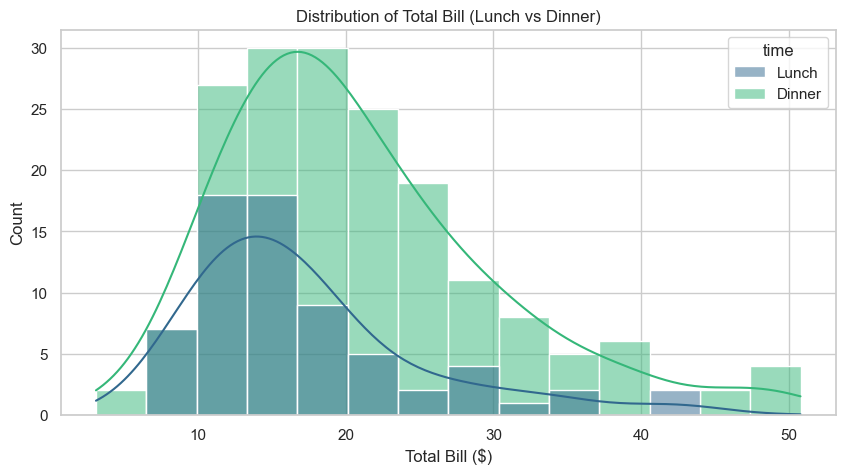

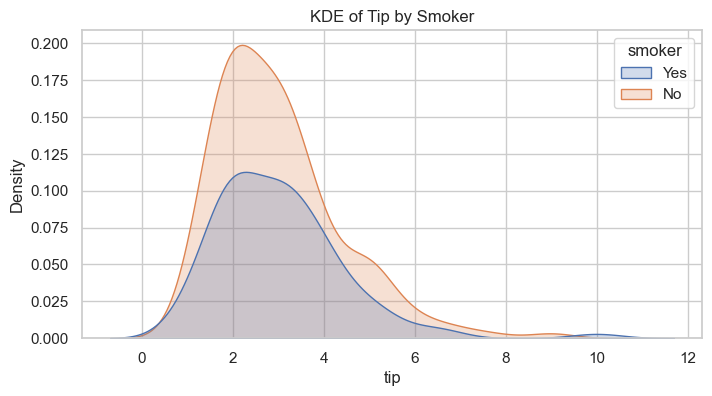

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(data=tips, x='total_bill', kde=True, hue='time', palette='viridis')
plt.title('Distribution of Total Bill (Lunch vs Dinner)')
plt.xlabel('Total Bill ($)')
plt.show()

plt.figure(figsize=(8, 4))
sns.kdeplot(data=tips, x='tip', hue='smoker', fill=True)
plt.title('KDE of Tip by Smoker')
plt.show()

### How to Read
Histogram bars = frequency in each price range; KDE = smoothed density. Hue splits by category (e.g. time).

### Inference
Most bills in a certain range; compare skew and spread between lunch and dinner, or smokers vs non-smokers.

---
# 7. Box Plot & Violin Plot

## Theory
- **Box plot**: Box = IQR (25th–75th percentile); line inside = median; whiskers = range (or 1.5×IQR); points = outliers. Good for comparing distributions and spotting outliers.
- **Violin plot**: Shows full distribution shape (like a smoothed histogram) per category. Better for seeing multimodality.

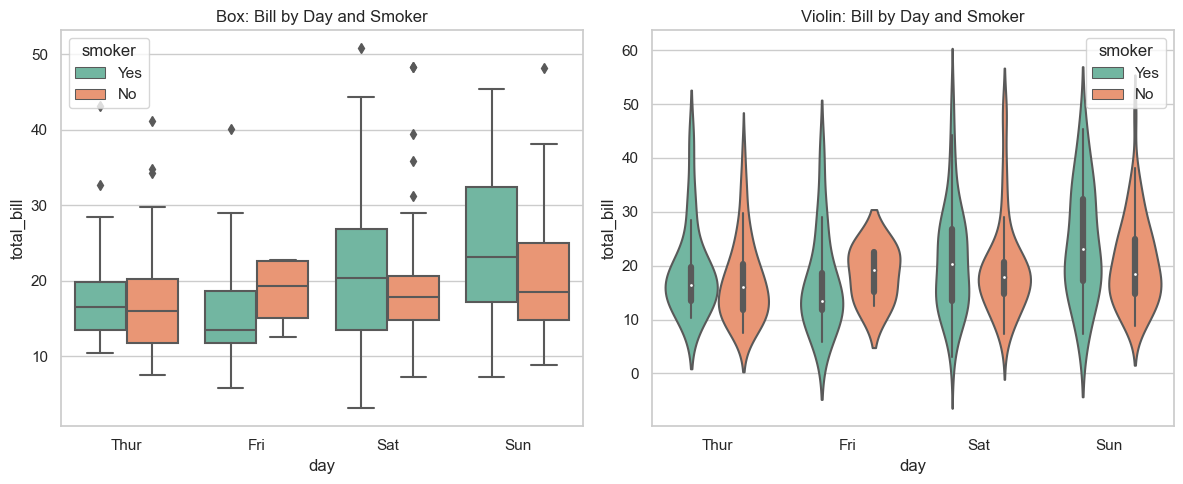

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker', ax=axes[0], palette='Set2')
axes[0].set_title('Box: Bill by Day and Smoker')

sns.violinplot(data=tips, x='day', y='total_bill', hue='smoker', ax=axes[1], palette='Set2')
axes[1].set_title('Violin: Bill by Day and Smoker')
plt.tight_layout()
plt.show()

### How to Read
Box: median, quartiles, outliers. Violin: width = density at each value.

### Inference
Compare central tendency and spread across days; violin reveals bimodal or skewed shapes that box hides.

---
# 8. Scatter & Regression (lmplot)

## Theory
- **Scatter**: Two numeric variables; each point = one row. Use to see relationship, clustering, outliers.
- **lmplot**: Scatter + regression line (and optional CI band). Use when you want to show **trend** or correlation.
- `sns.lmplot(data=df, x='...', y='...', hue='...')` creates a figure-level plot (use `height`, `aspect`).

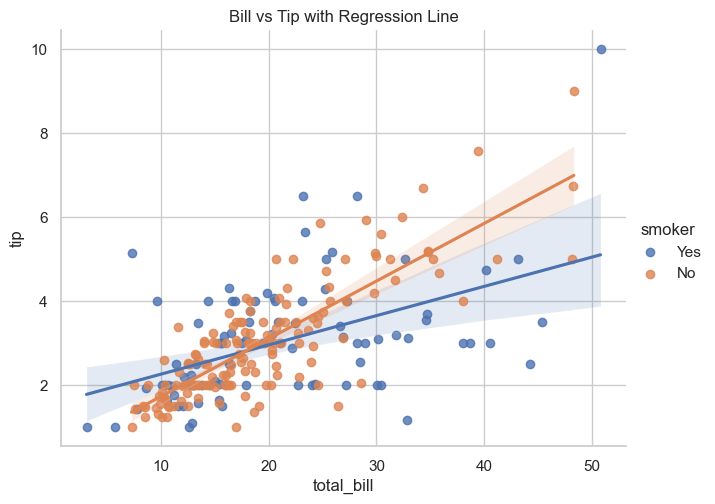

In [6]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', height=5, aspect=1.3)
plt.title('Bill vs Tip with Regression Line')
plt.show()

### How to Read
Points = (bill, tip); line = linear fit; band = confidence interval. Similar slope for both hues = similar tipping rate.

### Inference
Positive relationship: higher bill tends to higher tip; compare slopes/levels by smoker if needed.

---
# 9. Joint Plot & Pair Plot

## Theory
- **Joint plot**: Central plot (e.g. scatter or hexbin) + marginal distributions (histograms or KDE) on top and right. Shows bivariate relationship and both univariate distributions.
- **Pair plot**: Grid of scatter plots for every pair of numeric columns; diagonal can be KDE/hist. Use for multi-variable EDA (careful with many columns).

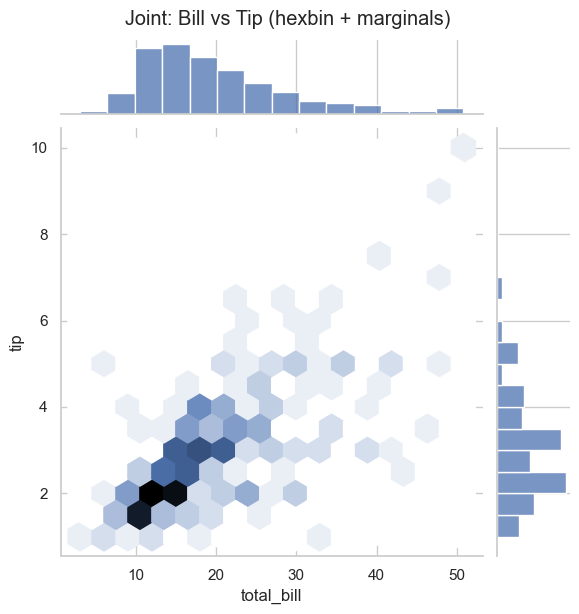

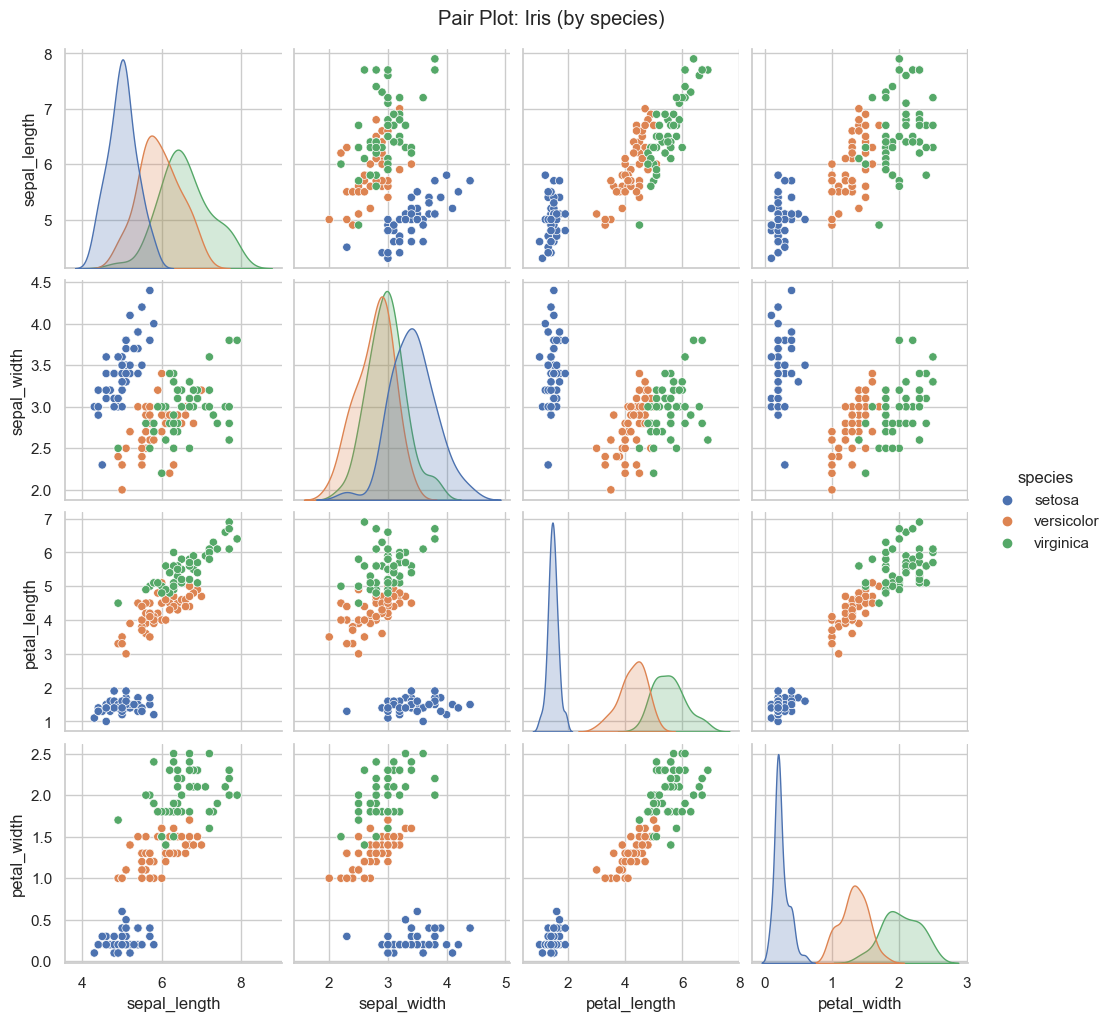

In [7]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.suptitle('Joint: Bill vs Tip (hexbin + marginals)', y=1.02)
plt.show()

sns.pairplot(iris, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot: Iris (by species)', y=1.02)
plt.show()

### How to Read
Joint: center = density of (bill, tip); sides = distributions of bill and tip. Pair: each cell = relationship between two features; diagonal = distribution per species.

### Inference
Joint shows where (bill, tip) points concentrate. Pair plot shows which features separate species (e.g. petal length/width).

---
# 10. Heatmap (Correlation)

## Theory
- **Heatmap**: Matrix of values as colors. Common use = correlation matrix: each cell = correlation between two numeric variables (-1 to 1).
- `sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')`. Use `annot=True` to show numbers; `coolwarm` = blue (negative), red (positive).

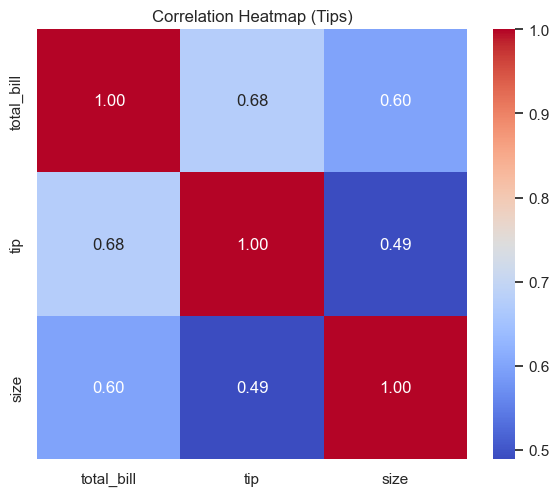

In [8]:
numeric = tips.select_dtypes(include=[np.number])
corr = numeric.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap (Tips)')
plt.tight_layout()
plt.show()

### How to Read
Red = positive correlation, blue = negative; value 1 on diagonal (variable with itself).

### Inference
Identify strongly related features (e.g. total_bill vs tip); useful for feature selection and multicollinearity.

---
# 11. Pie & Area Charts

## Theory
- **Pie chart**: Parts of a whole; each slice = proportion. Use for few categories; avoid when many slices or when comparing magnitudes (bar is often clearer).
- **Area chart**: Like line plot with area under the line filled. Good for showing cumulative or stacked contribution over time.

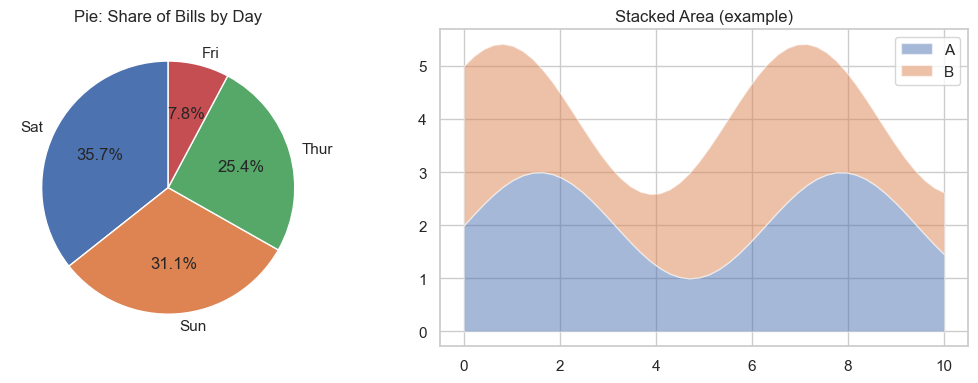

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

day_counts = tips['day'].value_counts()
axes[0].pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Pie: Share of Bills by Day')

x = np.linspace(0, 10, 50)
y1 = np.sin(x) + 2
y2 = np.cos(x) + 2
axes[1].fill_between(x, 0, y1, alpha=0.5, label='A')
axes[1].fill_between(x, y1, y1 + y2, alpha=0.5, label='B')
axes[1].set_title('Stacked Area (example)')
axes[1].legend()
plt.tight_layout()
plt.show()

---
# 12. Time Series & Multiple Lines

## Theory
- For **time series**: use datetime on x-axis; one or more series as lines.
- **Multiple lines**: call `plt.plot()` (or ax.plot()) several times with labels; add `plt.legend()`.

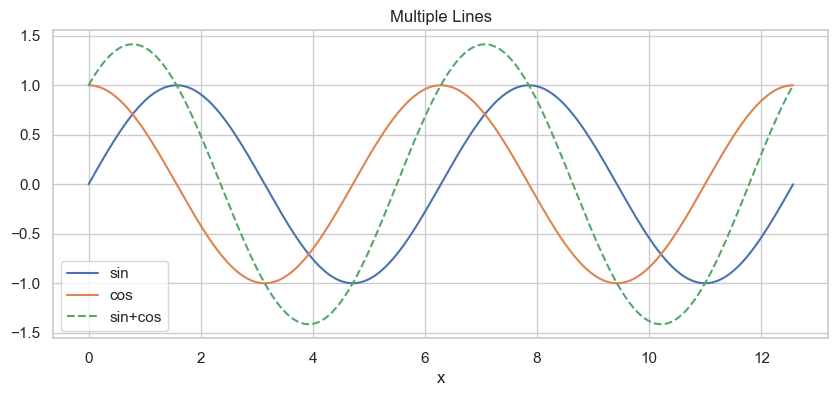

In [11]:
x = np.linspace(0, 4*np.pi, 200)
plt.figure(figsize=(10, 4))
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, np.cos(x), label='cos')
plt.plot(x, np.sin(x) + np.cos(x), label='sin+cos', linestyle='--')
plt.title('Multiple Lines')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.show()

---
# 13. Subplots (Multiple Axes)

## Theory
- `fig, axes = plt.subplots(rows, cols, figsize=(w,h))` creates a grid of axes. `axes` can be 2D (e.g. `axes[0,1]`) or 1D (e.g. `axes[1]`).
- Pass `ax=axes[i]` to seaborn/matplotlib so each plot goes to the right panel. Use `plt.tight_layout()` to avoid overlap.

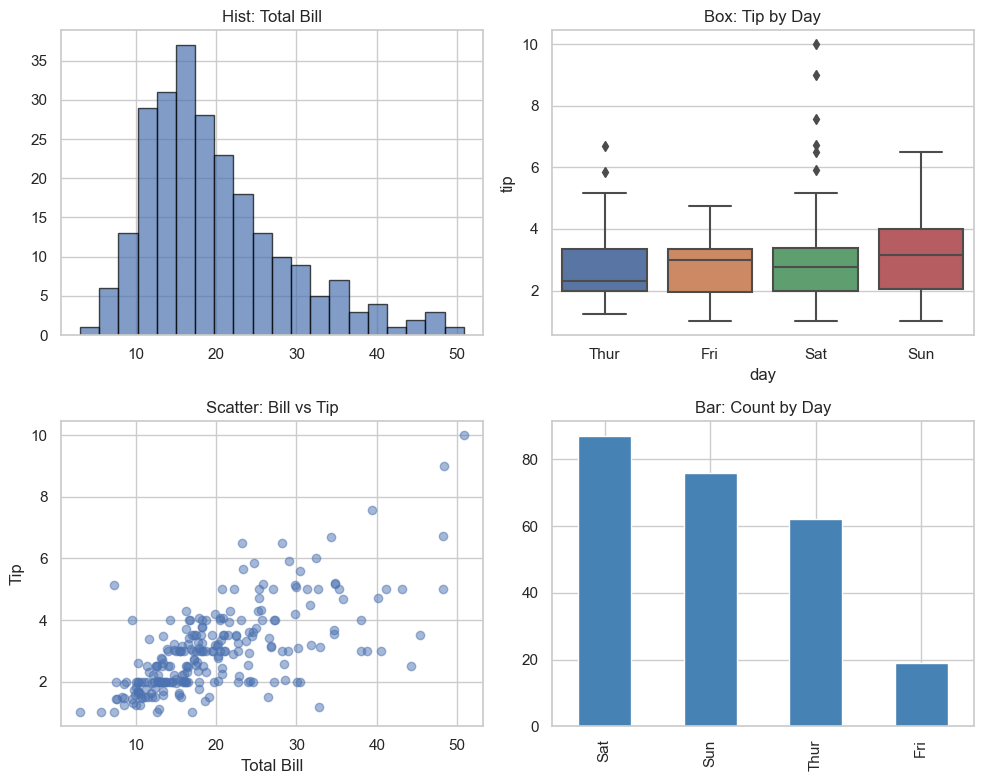

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].hist(tips['total_bill'], bins=20, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Hist: Total Bill')

sns.boxplot(data=tips, x='day', y='tip', ax=axes[0,1])
axes[0,1].set_title('Box: Tip by Day')

axes[1,0].scatter(tips['total_bill'], tips['tip'], alpha=0.5)
axes[1,0].set_xlabel('Total Bill')
axes[1,0].set_ylabel('Tip')
axes[1,0].set_title('Scatter: Bill vs Tip')

tips['day'].value_counts().plot(kind='bar', ax=axes[1,1], color='steelblue')
axes[1,1].set_title('Bar: Count by Day')
plt.tight_layout()
plt.show()

---
# 14. Best Practices & Summary

## Theory – Best Practices
1. **Title & labels**: Every plot should have a clear title, x-label, y-label.
2. **Legend**: When multiple series or hues, add a legend.
3. **Avoid clutter**: Don’t plot too many categories or lines in one chart; use facets or subplots.
4. **Choose the right chart**: Use the selection guide (section 2); e.g. don’t use pie for many categories.
5. **Color**: Use color for meaning (e.g. hue); consider colorblind-friendly palettes (e.g. colorblind).
6. **Consistent style**: `sns.set_theme()` and same figsize/conventions across a report.

## Summary – Chart Quick Reference

| Chart | Main use | Seaborn / Matplotlib |
|-------|----------|-----------------------|
| Line | Trend over continuous x | plt.plot, sns.lineplot |
| Bar | Compare values by category | sns.barplot |
| Count | Count per category | sns.countplot |
| Histogram | Distribution (1 numeric) | sns.histplot |
| KDE | Smooth distribution | sns.kdeplot |
| Box | Compare distributions, outliers | sns.boxplot |
| Violin | Distribution shape by category | sns.violinplot |
| Scatter | Two numeric variables | plt.scatter, sns.scatterplot |
| lmplot | Scatter + regression | sns.lmplot |
| Joint | Bivariate + marginals | sns.jointplot |
| Pair | All pairs of numeric columns | sns.pairplot |
| Heatmap | Matrix (e.g. correlation) | sns.heatmap |
| Pie | Part of whole (few categories) | plt.pie |
| Subplots | Multiple different plots | plt.subplots + ax= |